# Описание задачи

В датасете содержится информация о 187тыс. игровых приложений, размещенных на площадке App Store к 2021 году.

Задача – классифицировать по признаку purchases.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Чтение данных и основные характеристики
Прочитаем датасет:

In [2]:

DATASET_PATH = os.path.abspath(os.path.join(os.getcwd(), 'appstore_games_march_2021.csv'))

data = pd.read_csv(DATASET_PATH)

Удалим ненужные столбцы:

In [3]:
del data['url'] 
del data['icon_url']
del data['name_app']

Выведем основную информацию о датасете:

In [4]:
data.shape

(187907, 21)

In [5]:
data.head(5)

,Unnamed: 0,id,developer,age_rating,size,price,purchases,languages,category,sub_category,...,last_version_date,version_count,watch,ipad,ipod,iphone,tv,mac,rating_avg,rating_count
0,0,1221248388,Anchalee Pradissook,4+,191.6 MB,Free,No,English,Games,Games,...,2017-03-31,1.0,0,1,1,1,0,0,5.0,1
1,1,1302771128,Alkis Hadjinicolaou,4+,20 MB,$0.99,No,English,Games,Action,...,2018-08-22,1.0,0,0,1,1,0,0,0.0,0
2,2,1535473269,Valerii Kot,4+,46.7 MB,Free,No,English,Games,Puzzle,...,2020-10-13,1.0,0,1,1,1,0,0,0.0,0
3,3,1490641095,Aaron Hibberd,12+,188 MB,Free,Yes,English,Games,Adventure,...,2020-10-16,2.0,0,1,1,1,0,0,4.9,116
4,4,1128166384,Pruettanon Rattanalaoo,4+,7.6 MB,Free,No,English,Games,Strategy,...,2016-09-17,2.0,0,1,1,1,0,0,3.5,2


In [6]:
data.describe()

,Unnamed: 0,id,version_count,watch,ipad,ipod,iphone,tv,mac,rating_avg
count,187907.000000,1.879070e+05,126886.000000,187907.000000,187907.000000,187907.000000,187907.000000,187907.000000,187907.000000,187907.000000
mean,93953.000000,1.193945e+09,4.428054,0.002411,0.886737,0.960821,0.960922,0.010090,0.247654,2.666834
std,54244.222854,3.003843e+08,5.648048,0.049040,0.316915,0.194021,0.193781,0.099942,0.431651,2.075853
min,0.000000,2.817365e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46976.500000,1.029854e+09,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,93953.000000,1.230302e+09,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.500000
75%,140929.500000,1.462331e+09,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.600000
max,187906.000000,1.544829e+09,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187907 entries, 0 to 187906
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         187907 non-null  int64  
 1   id                 187907 non-null  int64  
 2   developer          187907 non-null  object 
 3   age_rating         187907 non-null  object 
 4   size               187905 non-null  object 
 5   price              187768 non-null  object 
 6   purchases          187731 non-null  object 
 7   languages          187087 non-null  object 
 8   category           187907 non-null  object 
 9   sub_category       129776 non-null  object 
 10  release_date       126886 non-null  object 
 11  last_version_date  126886 non-null  object 
 12  version_count      126886 non-null  float64
 13  watch              187907 non-null  int64  
 14  ipad               187907 non-null  int64  
 15  ipod               187907 non-null  int64  
 16  ip

# Обработка пропущенных значений и категориальных признаков

Столбцы с пропущенными значениями и их количество:

In [8]:
nullcnt = data.isnull().sum()
nullcnt[nullcnt != 0]

size                     2
price                  139
purchases              176
languages              820
sub_category         58131
release_date         61021
last_version_date    61021
version_count        61021
dtype: int64

Количество строк с пропущенными значениями невелико относительно размеров выборки, удалим их

In [9]:
data = data.dropna(axis = 0)

Приведем теперь все столбцы к числовому или категориальному виду

In [10]:
data["age_rating"] = data["age_rating"].str[:-1].astype(int)
data["age_rating"]

0          4
1          4
2          4
3         12
4          4
          ..
187899     4
187900     4
187901     4
187902     4
187903     4
Name: age_rating, Length: 126202, dtype: int32

In [11]:
data['size'] = data['size'].replace({'KB': '/2**10', 'MB': '', 'GB': '*2**10'}, regex=True).map(pd.eval, na_action='ignore')
data['size']

0         191.6
1          20.0
2          46.7
3         188.0
4           7.6
          ...  
187899    115.0
187900    239.5
187901     41.7
187902     75.2
187903    253.0
Name: size, Length: 126202, dtype: float64

In [12]:
data["price"] = pd.to_numeric(data["price"].replace('Free', '0').replace('Size', np.nan).str.replace('$',''))
data = data.dropna(axis = 0)
data["price"]

0         0.00
1         0.99
2         0.00
3         0.00
4         0.00
          ... 
187899    0.00
187900    0.00
187901    3.99
187902    0.00
187903    0.99
Name: price, Length: 126196, dtype: float64

In [13]:
data["purchases"] = pd.factorize(data["purchases"])[0]
data["purchases"]

0         0
1         0
2         0
3         1
4         0
         ..
187899    1
187900    0
187901    0
187902    0
187903    1
Name: purchases, Length: 126196, dtype: int64

In [14]:
data['rating_count'] = data['rating_count'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [15]:
columns = ["age_rating", "size", "price", "purchases", "sub_category", "rating_avg", "rating_count", "ipad", "iphone", "mac"]
data = data.loc[:, columns]

In [16]:
dummies = pd.get_dummies(data["sub_category"], dtype=int)
data = pd.concat((data, dummies), axis=1)
data = data.drop(['sub_category'], axis=1)
data.head(5)

,age_rating,size,price,purchases,rating_avg,rating_count,ipad,iphone,mac,Action,...,Games,Music,Puzzle,Racing,Role Playing,Simulation,Sports,Strategy,Trivia,Word
0,4,191.6,0.00,0,5.0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,4,20.0,0.99,0,0.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4,46.7,0.00,0,0.0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,12,188.0,0.00,1,4.9,116,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,7.6,0.00,0,3.5,2,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Визуализация данных

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


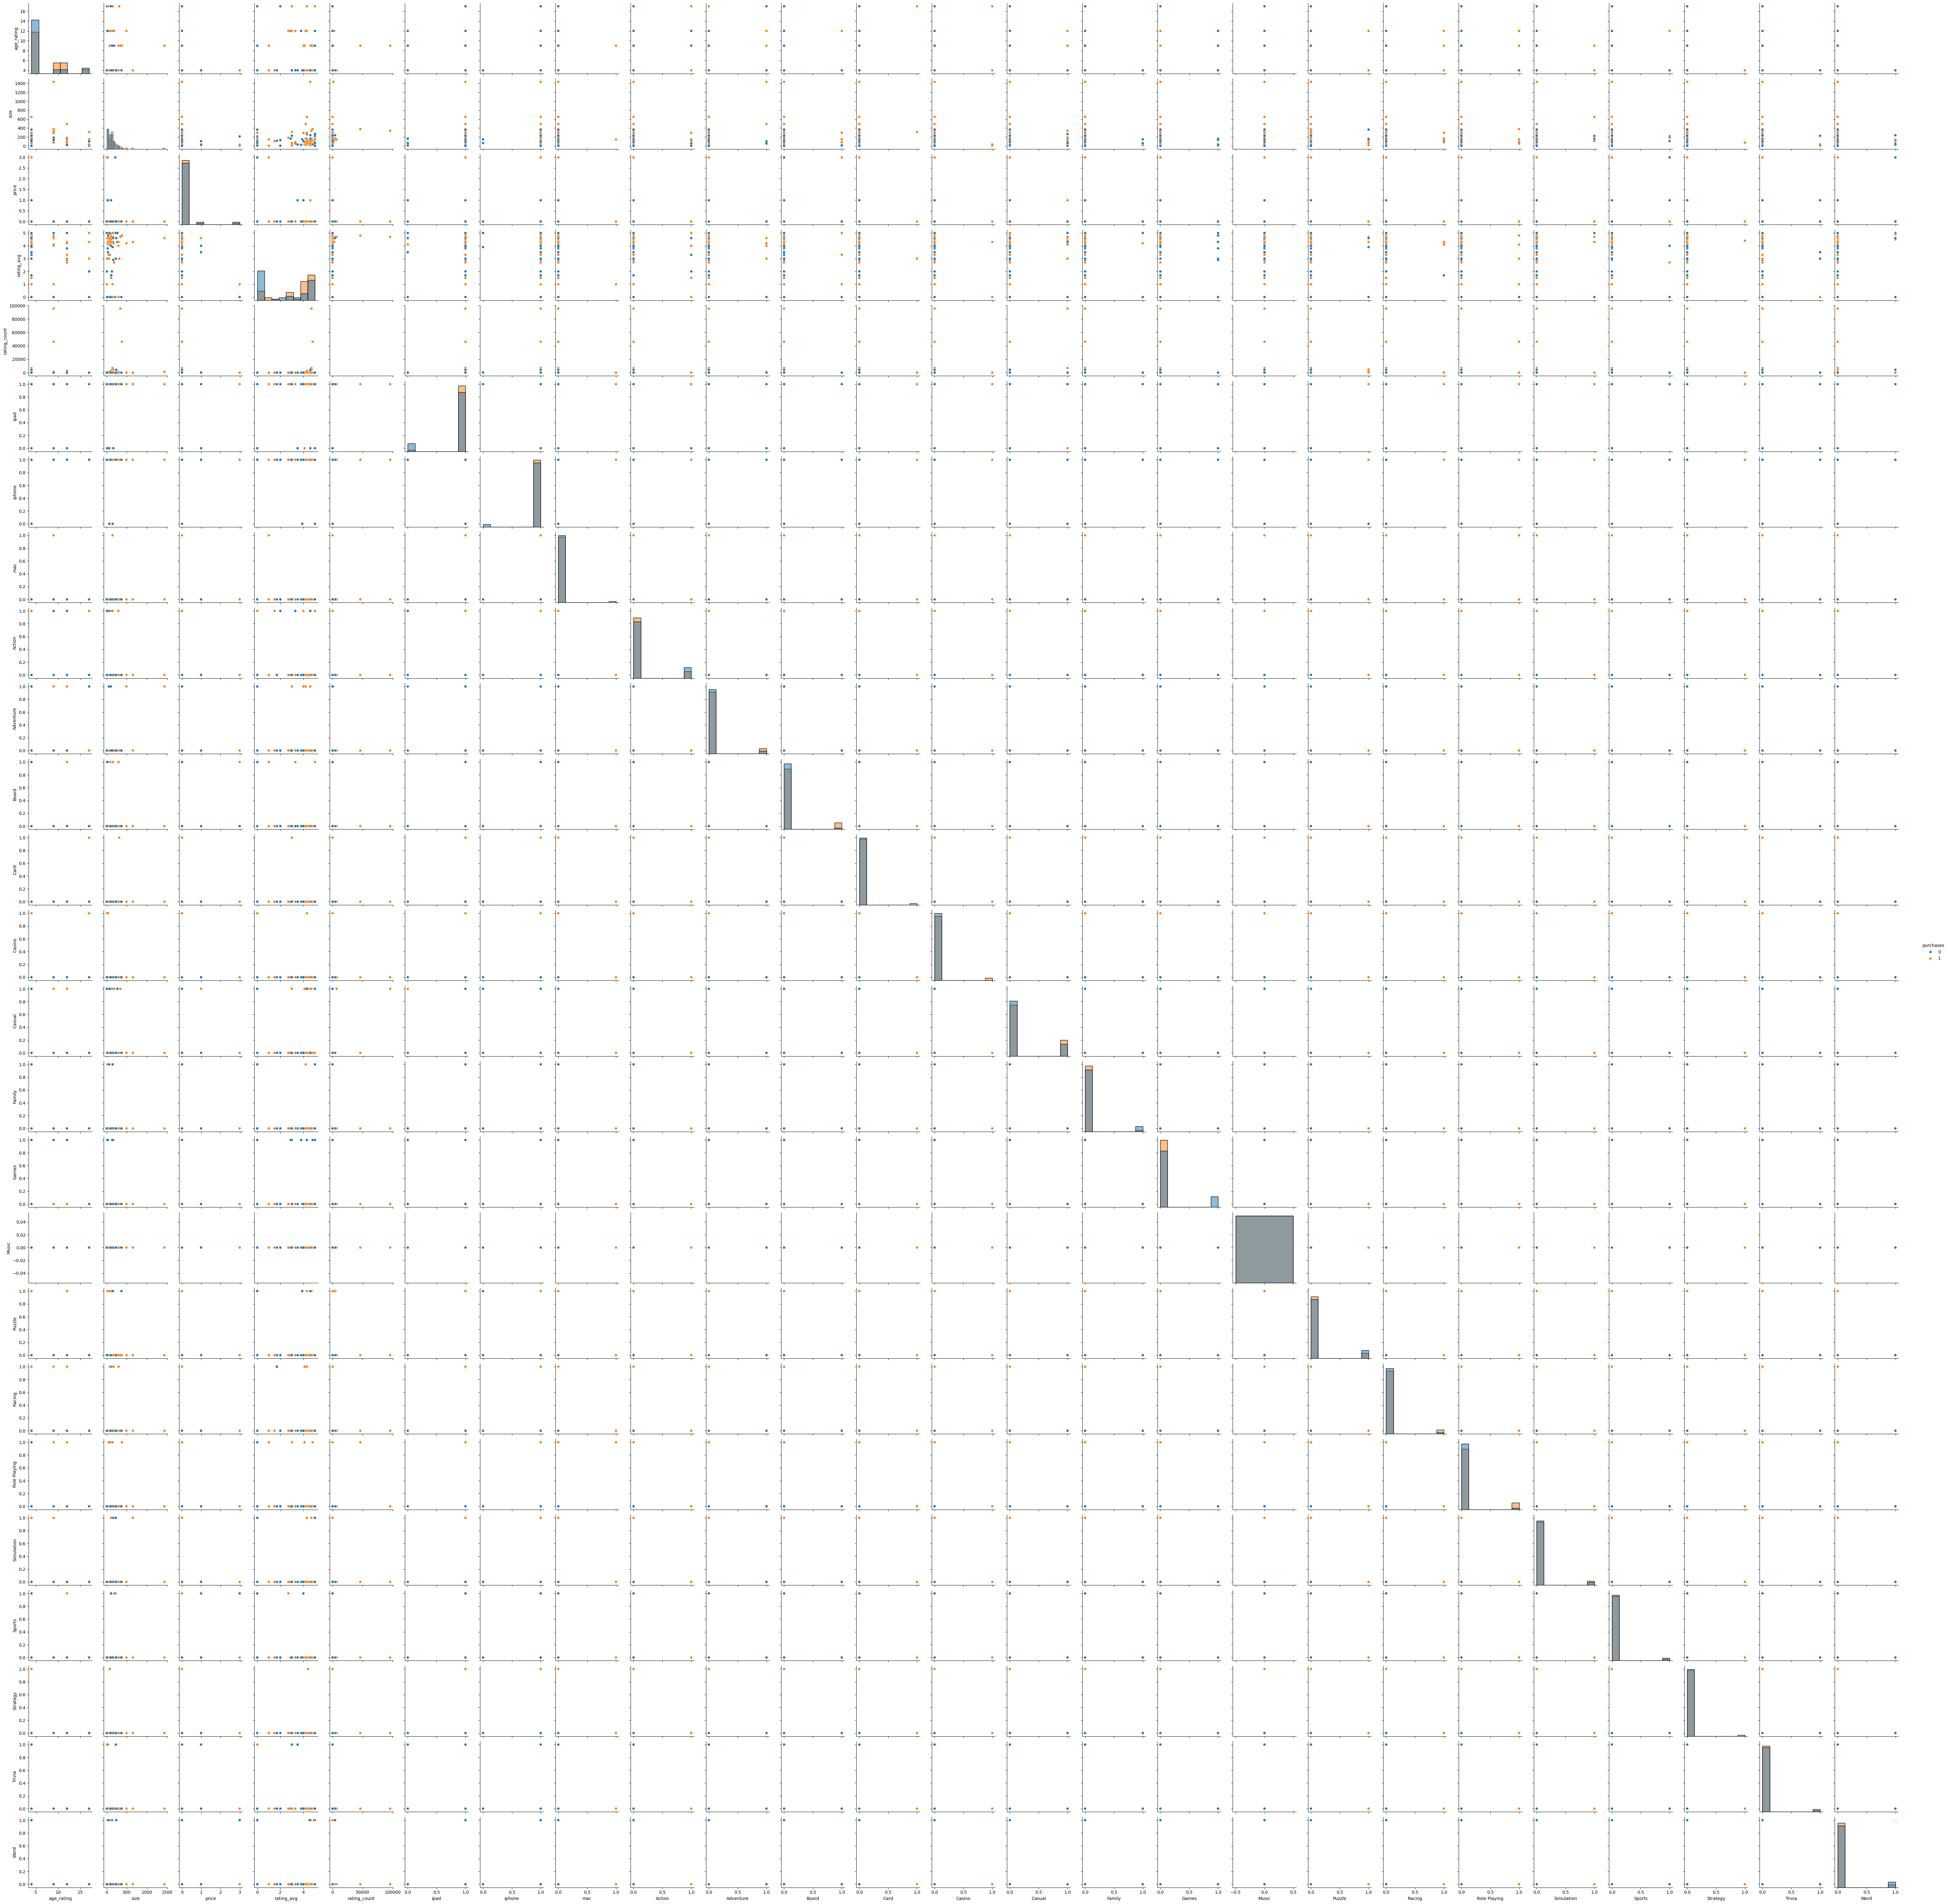

In [17]:
np.random.seed(1)
random_subset = np.random.choice(np.arange(data.shape[0]), size=100, replace=False)
sns.pairplot(data.iloc[random_subset], hue='purchases', diag_kind='hist')
plt.legend()

<Axes: >

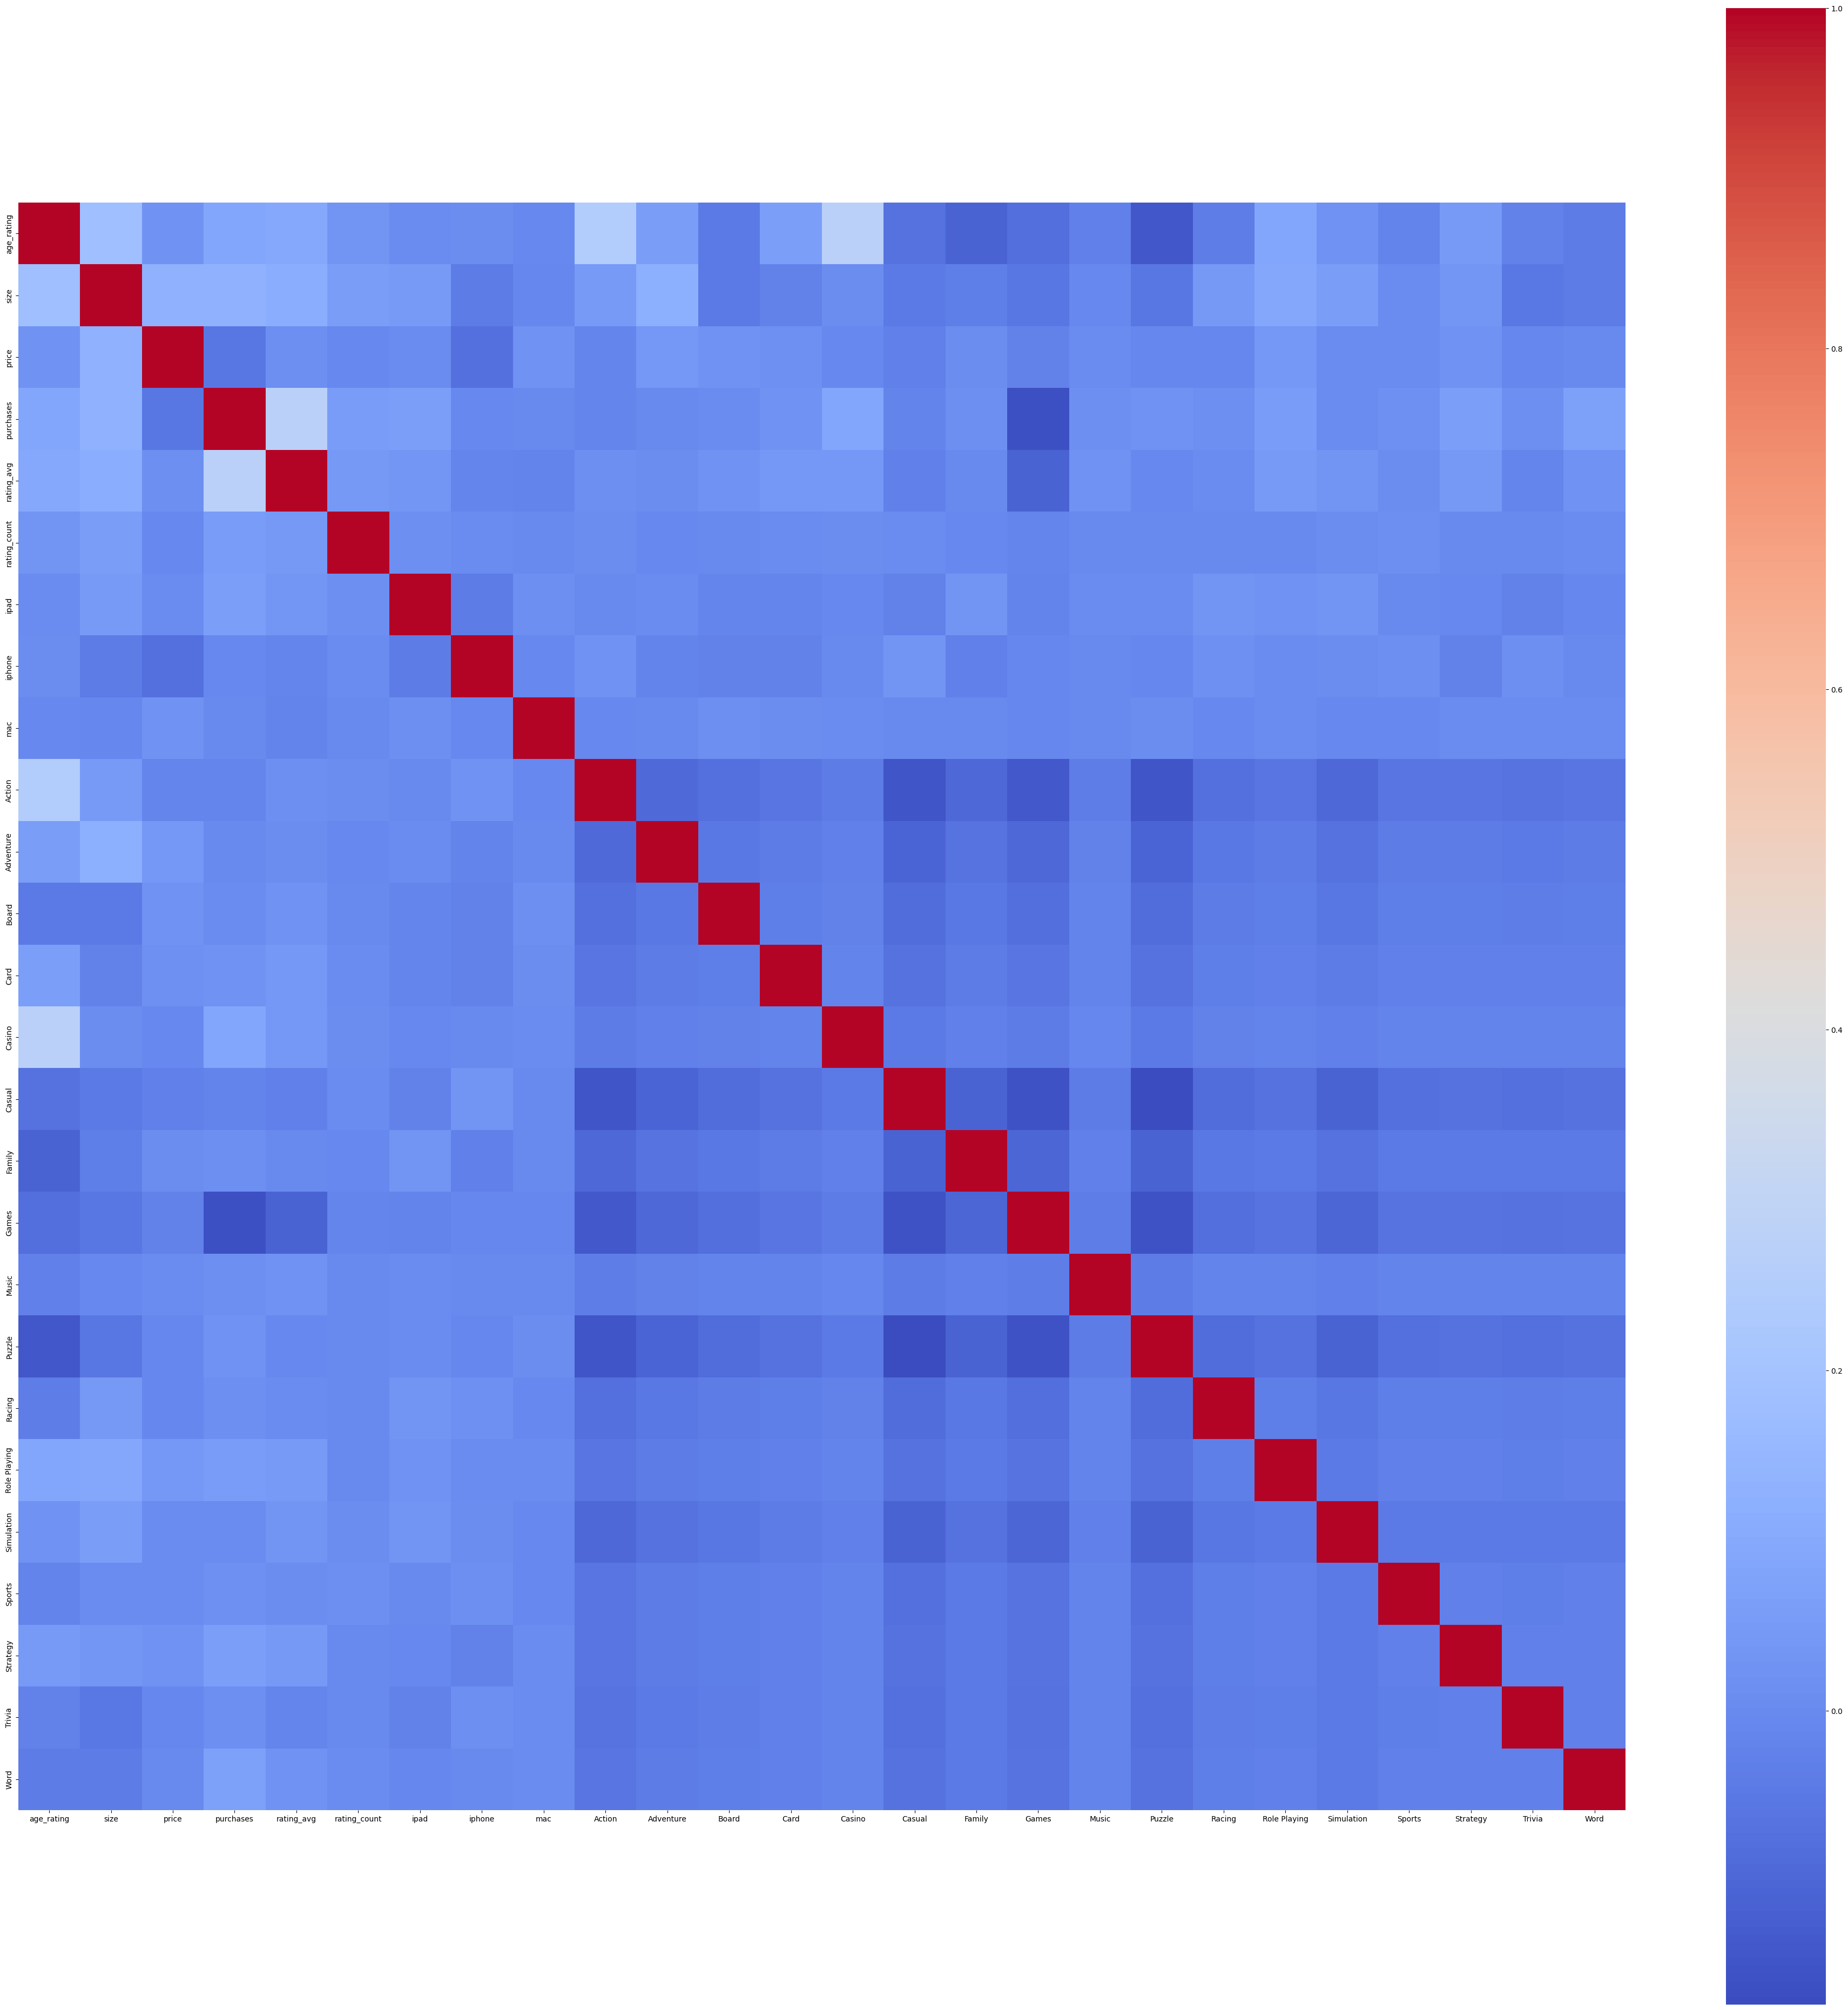

In [18]:
correlation_matrix = data.corr()
plt.figure(figsize = (48, 48))
sns.heatmap(correlation_matrix, square=True, cmap="coolwarm")

Наличия слишком сильно коррелирующих переменных не наблюдается, удалять ничего не нужно (смешение таких переменных увеличивало бы вклад их общего базового фактора)

Text(0, 0.5, 'price')

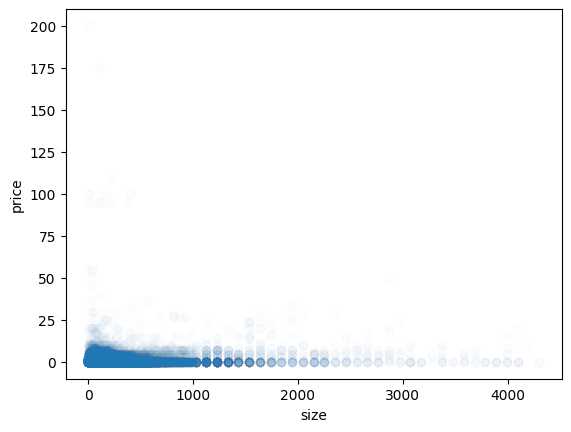

In [19]:
plt.scatter(data["size"], data["price"], alpha=0.01)
plt.xlabel("size")
plt.ylabel("price")

Text(0, 0.5, 'rating_avg')

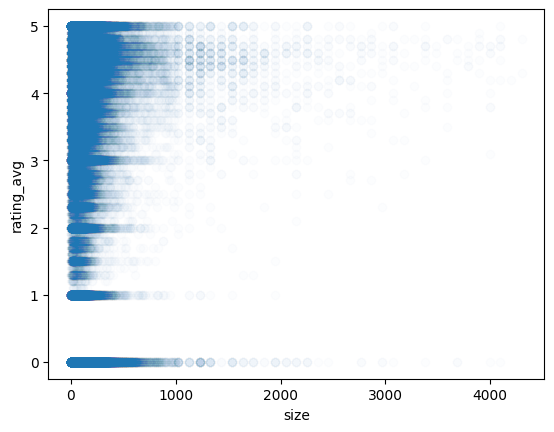

In [20]:
plt.scatter(data["size"], data["rating_avg"], alpha=0.01)
plt.xlabel("size")
plt.ylabel("rating_avg")

Text(0, 0.5, 'rating_count')

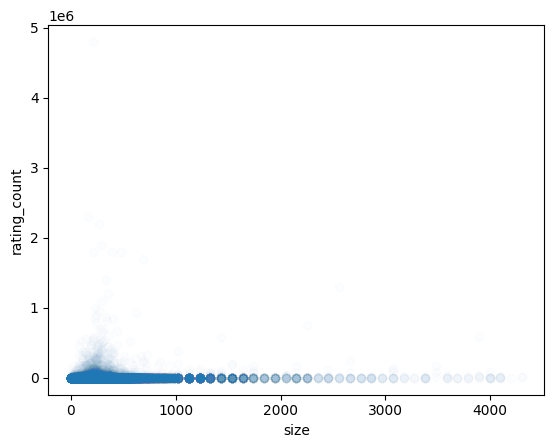

In [21]:
plt.scatter(data["size"], data["rating_count"], alpha=0.01)
plt.xlabel("size")
plt.ylabel("rating_count")

Text(0, 0.5, 'rating_count')

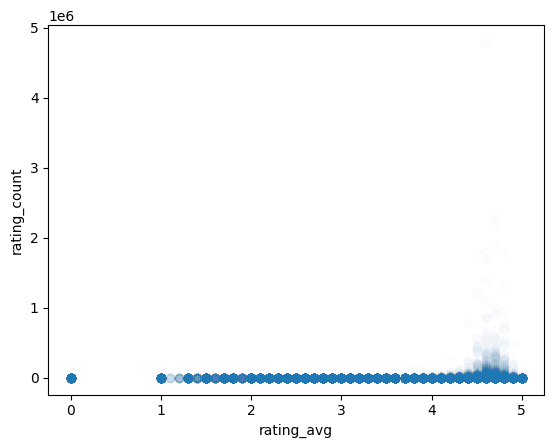

In [22]:
plt.scatter(data["rating_avg"], data["rating_count"], alpha=0.01)
plt.xlabel("rating_avg")
plt.ylabel("rating_count")

<Axes: xlabel='rating_avg', ylabel='price'>

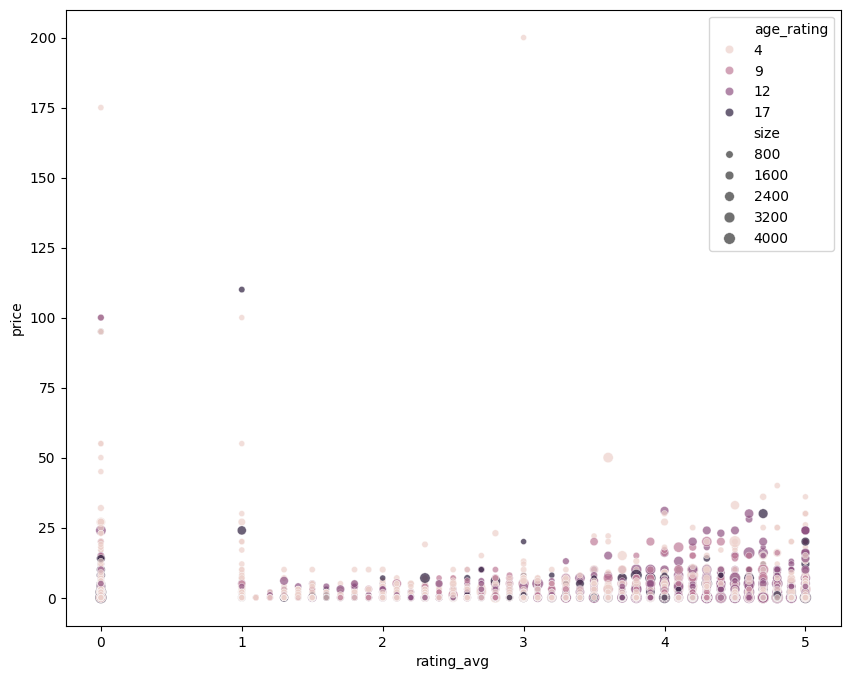

In [23]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x="rating_avg", y="price", size="size", hue="age_rating", data = data, alpha=0.7)

Признаки "price", "rating_count" и "size" содержат выбросы, избавимся от них

In [24]:
rows_to_drop = data[
    (data["price"] < data["price"].quantile(0.005))
    | (data["price"] > data["price"].quantile(0.995))
    | (data["size"] < data["size"].quantile(0.005)) 
    | (data["size"] > data["size"].quantile(0.995))
    | (data["rating_count"] < data["rating_count"].quantile(0.005)) 
    | (data["rating_count"] > data["rating_count"].quantile(0.995))].index
data = data.drop(rows_to_drop)

Text(0, 0.5, 'price')

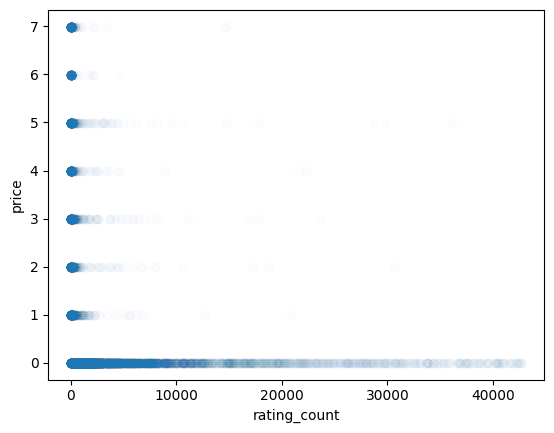

In [25]:
plt.scatter(data["rating_count"], data["price"], alpha=0.01)
plt.xlabel("rating_count")
plt.ylabel("price")

Text(0, 0.5, 'rating_count')

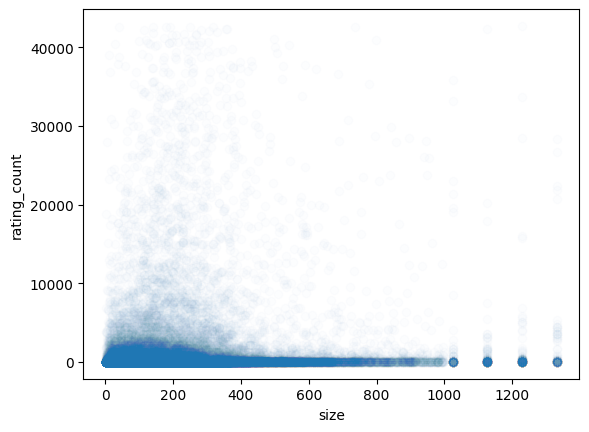

In [26]:
plt.scatter(data["size"], data["rating_count"], alpha=0.01)
plt.xlabel("size")
plt.ylabel("rating_count")

In [27]:
data.head()

,age_rating,size,price,purchases,rating_avg,rating_count,ipad,iphone,mac,Action,...,Games,Music,Puzzle,Racing,Role Playing,Simulation,Sports,Strategy,Trivia,Word
0,4,191.6,0.00,0,5.0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,4,20.0,0.99,0,0.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4,46.7,0.00,0,0.0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,12,188.0,0.00,1,4.9,116,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,7.6,0.00,0,3.5,2,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Нормализация

In [28]:
columns_to_norm = ['age_rating', 'size', 'price', 'rating_avg', 'rating_count']
data_numerical = data[columns_to_norm]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

data_numerical.describe()

,age_rating,size,price,rating_avg,rating_count
count,1.240210e+05,1.240210e+05,1.240210e+05,1.240210e+05,1.240210e+05
mean,-3.357319e-17,-4.809674e-17,4.200945e-17,3.185442e-17,-9.567786e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.228144e-01,-8.350769e-01,-2.317495e-01,-1.284339e+00,-1.402300e-01
25%,-5.228144e-01,-6.132618e-01,-2.317495e-01,-1.284339e+00,-1.402300e-01
50%,-5.228144e-01,-2.798283e-01,-2.317495e-01,4.000784e-01,-1.393065e-01
75%,-5.228144e-01,2.235212e-01,-2.317495e-01,9.294668e-01,-1.346888e-01
max,2.932879e+00,8.616234e+00,9.505269e+00,1.121972e+00,1.957724e+01


In [29]:
other_columns = [item for item in data.columns.tolist() if item not in columns_to_norm]
data_other = data[other_columns]
data_normalized = pd.concat((data_numerical, data_other), axis = 1)
data_normalized.head(5)

,age_rating,size,price,rating_avg,rating_count,purchases,ipad,iphone,mac,Action,...,Games,Music,Puzzle,Racing,Role Playing,Simulation,Sports,Strategy,Trivia,Word
0,-0.522814,0.514298,-0.231749,1.121972,-0.139768,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.522814,-0.705685,1.147313,-1.284339,-0.140230,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.522814,-0.515862,-0.231749,-1.284339,-0.140230,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.603766,0.488704,-0.231749,1.073845,-0.086665,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.522814,-0.793842,-0.231749,0.400078,-0.139306,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Борьба с несбалансированностью классов

In [30]:
classTrue = data_normalized['purchases'][(data_normalized['purchases']==True)].count() / data_normalized['purchases'].count()
print(f'Класс True: {classTrue * 100}%, Класс False:{(1 - classTrue) * 100}%')

Класс True: 35.68347296022448%, Класс False:64.31652703977552%


Классы не сбалансированны, стоит добиться соотношения 1 к 1.

In [31]:
data_normalized_true = data_normalized[data_normalized['purchases'] == True]
data_normalized_false = data_normalized[data_normalized['purchases'] == False].sample(frac= (1 - (1 - 0.5 / (1 - classTrue)) * 2))
balanced_data_normalized = pd.concat([data_normalized_true, data_normalized_false])
classTrue = balanced_data_normalized['purchases'][(balanced_data_normalized['purchases']==True)].count() / balanced_data_normalized['purchases'].count()
print(f'Класс True: {classTrue * 100}%, Класс False:{(1 - classTrue) * 100}%')
balanced_data_normalized.shape

Класс True: 50.0%, Класс False:50.0%


(88510, 26)

In [32]:
balanced_data_normalized.isnull().describe()

,age_rating,size,price,rating_avg,rating_count,purchases,ipad,iphone,mac,Action,...,Games,Music,Puzzle,Racing,Role Playing,Simulation,Sports,Strategy,Trivia,Word
count,88510,88510,88510,88510,88510,88510,88510,88510,88510,88510,...,88510,88510,88510,88510,88510,88510,88510,88510,88510,88510
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,88510,88510,88510,88510,88510,88510,88510,88510,88510,88510,...,88510,88510,88510,88510,88510,88510,88510,88510,88510,88510


# Подготовка выборок

Целевой признак – purchases.

In [33]:
X = balanced_data_normalized.drop (["purchases"], axis=1)
y = balanced_data_normalized["purchases"]
print(X.shape)
print(y.shape)

(88510, 25)
(88510,)


Разделим 3 к 1:

In [34]:
import sklearn
import sklearn.model_selection
import sklearn.neighbors
import sklearn.ensemble
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

# Классификация

kNN

In [35]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
model.fit(X_train.values, y_train.values)
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

In [36]:
from sklearn.metrics import accuracy_score
print("Acc Train")
print(accuracy_score(y_train, y_train_pred))
print("Acc Test")
print(accuracy_score(y_test, y_test_pred))

Acc Train
0.7669850260612817
Acc Test
0.6600686912509038


In [37]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=9)
model.fit(X_train.values, y_train.values)
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

In [38]:
print("Acc Train")
print(accuracy_score(y_train, y_train_pred))
print("Acc Test")
print(accuracy_score(y_test, y_test_pred))

Acc Train
0.7378807508059414
Acc Test
0.669649313087491


In [39]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=13)
model.fit(X_train.values, y_train.values)
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

In [40]:
print("Acc Train")
print(accuracy_score(y_train, y_train_pred))
print("Acc Test")
print(accuracy_score(y_test, y_test_pred))

Acc Train
0.7261004489168751
Acc Test
0.676382863340564


Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [42]:
print("Acc Train")
print(accuracy_score(y_train, y_train_pred))
print("Acc Test")
print(accuracy_score(y_test, y_test_pred))

Acc Train
0.9750233497032328
Acc Test
0.6608369486623282


# Вывод

Можем видеть, что чем больше k, тем точнее алгоритм kNN на тестовой выборке.

На обучающей выборке алгоритм Random forest демонстрирует значительно более высокие результаты, чем KNN, но на тестовой выборке его точность уступает.


# * 
Попробуем подобрать оптимальные параметры для Random Forest

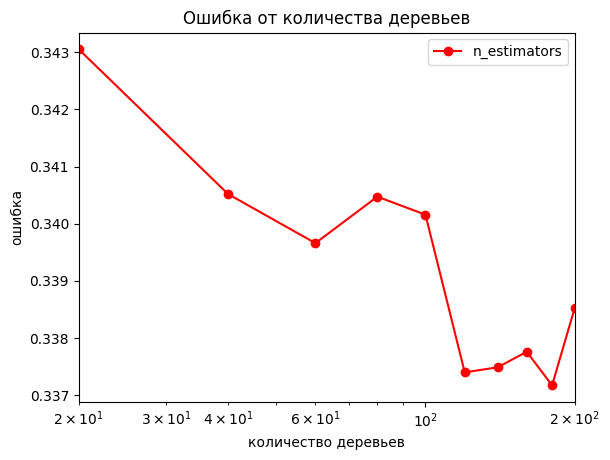

In [43]:
err_test = []

n_estimators = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

for n in n_estimators:
    mlp_model = RandomForestClassifier(n_estimators=n)
    mlp_model.fit(X_train, y_train)
    err_test.append(np.mean(y_test != mlp_model.predict(X_test)))

plt.semilogx(n_estimators, err_test, 'r-o', label = 'n_estimators')
plt.xlim([np.min(n_estimators), np.max(n_estimators)])
plt.title('Ошибка от количества деревьев')
plt.xlabel('количество деревьев')
plt.ylabel('ошибка')
plt.legend()

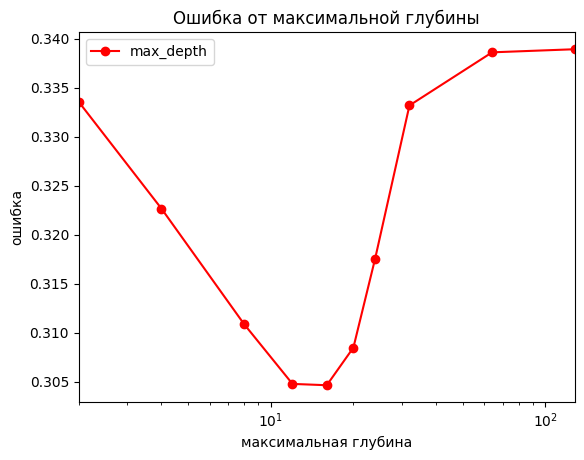

In [44]:
err_test = []

max_depth = [2, 4, 8, 12, 16, 20, 24, 32, 64, 128]

for d in max_depth:
    mlp_model = RandomForestClassifier(max_depth=d)
    mlp_model.fit(X_train, y_train)
    err_test.append(np.mean(y_test != mlp_model.predict(X_test)))

plt.semilogx(max_depth, err_test, 'r-o', label = 'max_depth')
plt.xlim([np.min(max_depth), np.max(max_depth)])
plt.title('Ошибка от максимальной глубины')
plt.xlabel('максимальная глубина')
plt.ylabel('ошибка')
plt.legend()

Оптимальное значение количества деревьев, видимо, где-то около 180, хотя строгой закономерности изменения ошибки не видно.

Оптимальная максимальная глубина же, как видно из графика – 12-16.